In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import lines
import matplotlib.cm as cm
import tqdm
from tqdm.notebook import tqdm as tqdm

import model_opt
import data_generate
import algo_GD

_t_max =1000
_cmap = plt.cm.jet
w_init = [5,5]

In [2]:
loss_transition = []
f_store=[]
f = model_opt.Bohachevsky(err = 2)
algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.03)

In [3]:
# updateを行うたびに異なるノイズが加えられる
for i in tqdm(algo):
    loss_transition.append(np.sum((f.w_star - algo.w) ** 2))
    f_store.append(f.f_opt(algo.w))
    algo.update(model=f)

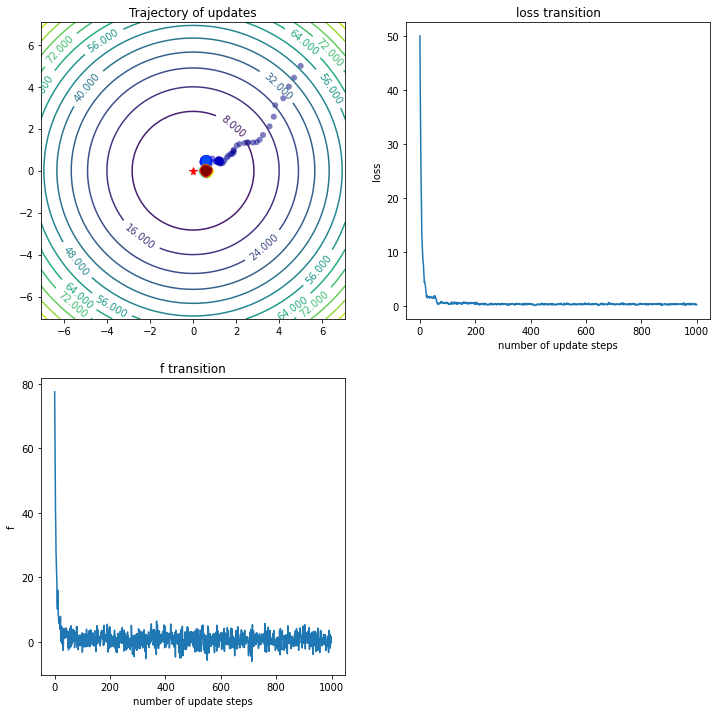

In [4]:
w_store = np.array(algo.wstore)
# 目的関数の真の値
w_star = f.w_star

# 等高線描画用
def circle(x, y,w):
    return (x-w) ** 2 + (y-w) ** 2

# wの軌跡
tmpdel = np.linalg.norm(w_star-w_init)
xvals = np.arange(w_star[0]-tmpdel, w_star[0]+tmpdel, 0.01)
yvals = np.arange(w_star[1]-tmpdel, w_star[1]+tmpdel, 0.01)
x1, x2 = np.meshgrid(xvals, yvals)
Z = circle(x1, x2,w_star[0])
myfig = plt.figure(figsize=(12,12))

ax1 = myfig.add_subplot(2,2,1)
plt.title("Trajectory of updates")
CS = ax1.contour(x1, x2, Z, levels=15)
c = np.linspace(0, _t_max, len(w_store))
ax1.scatter(w_store.T[0],w_store.T[1],c=c,cmap = _cmap,linewidths=0.01,alpha=0.5)
ax1.plot(*w_star, 'r*', markersize=8)
CS.clabel(inline=1, fontsize=10)


# 真の値とtステップ目のwとの２乗誤差の推移
ax2 = myfig.add_subplot(2,2,2)
plt.title("loss transition")
plt.xlabel('number of update steps')
plt.ylabel('loss')
ax2.plot(list(range(_t_max)),loss_transition)

# 関数値の推移
ax2 = myfig.add_subplot(2,2,3)
plt.title("f transition")
plt.xlabel('number of update steps')
plt.ylabel('f')
ax2.plot(list(range(_t_max)),f_store)

In [5]:
w_init = [0.6,1.1]
loss_transition = []
f_store=[]

f = model_opt.Perm(err = 5,b=0.0000001)
algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.0003)

In [6]:
for i in tqdm(algo):
    loss_transition.append(np.sum((f.w_star - algo.w) ** 2))
    f_store.append(f.f_opt(algo.w))
    algo.update(model=f)
    

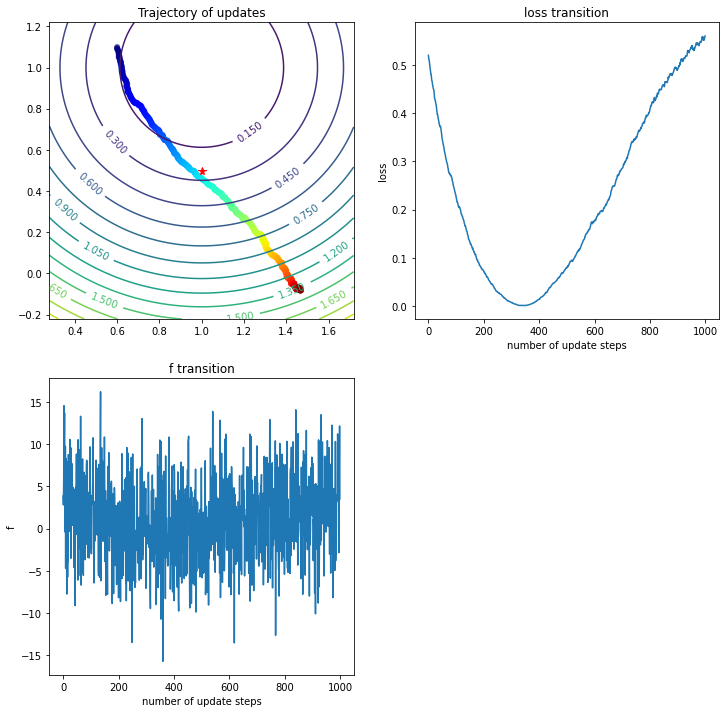

In [7]:
w_store = np.array(algo.wstore)
# 目的関数の真の値
w_star = f.w_star

# 等高線描画用
def circle(x, y,w):
    return (x-w) ** 2 + (y-w) ** 2

# wの軌跡
tmpdel = np.linalg.norm(w_star-w_init)
xvals = np.arange(w_star[0]-tmpdel, w_star[0]+tmpdel, 0.01)
yvals = np.arange(w_star[1]-tmpdel, w_star[1]+tmpdel, 0.01)
x1, x2 = np.meshgrid(xvals, yvals)
Z = circle(x1, x2,w_star[0])
myfig = plt.figure(figsize=(12,12))

ax1 = myfig.add_subplot(2,2,1)
plt.title("Trajectory of updates")
CS = ax1.contour(x1, x2, Z, levels=15)
c = np.linspace(0, _t_max, len(w_store))
ax1.scatter(w_store.T[0],w_store.T[1],c=c,cmap = _cmap,linewidths=0.01,alpha=0.5)
ax1.plot(*w_star, 'r*', markersize=8)
CS.clabel(inline=1, fontsize=10)


# 真の値とtステップ目のwとの２乗誤差の推移
ax2 = myfig.add_subplot(2,2,2)
plt.title("loss transition")
plt.xlabel('number of update steps')
plt.ylabel('loss')
ax2.plot(list(range(_t_max)),loss_transition)

# 関数値の推移
ax2 = myfig.add_subplot(2,2,3)
plt.title("f transition")
plt.xlabel('number of update steps')
plt.ylabel('f')
ax2.plot(list(range(_t_max)),f_store)

In [8]:
loss_transition = []
f_store=[]

f = model_opt.RotatedHyperEllipsoid(err = 3)
algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.003)

In [9]:
for i in tqdm(algo):
    loss_transition.append(np.sum((f.w_star - algo.w) ** 2))
    f_store.append(f.f_opt(algo.w))
    algo.update(model=f)

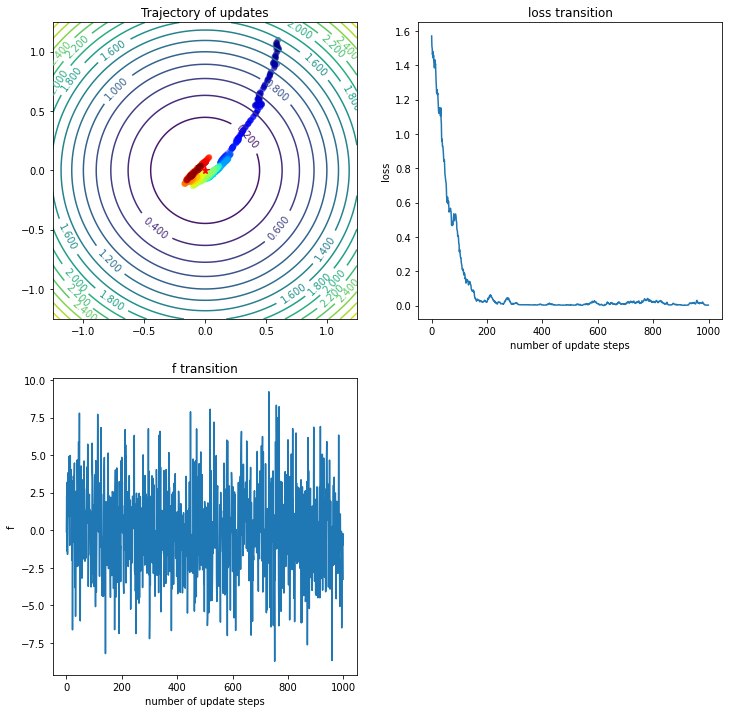

In [10]:
w_store = np.array(algo.wstore)
# 目的関数の真の値
w_star = f.w_star

# 等高線描画用
def circle(x, y,w):
    return (x-w) ** 2 + (y-w) ** 2

# wの軌跡
tmpdel = np.linalg.norm(w_star-w_init)
xvals = np.arange(w_star[0]-tmpdel, w_star[0]+tmpdel, 0.01)
yvals = np.arange(w_star[1]-tmpdel, w_star[1]+tmpdel, 0.01)
x1, x2 = np.meshgrid(xvals, yvals)
Z = circle(x1, x2,w_star[0])
myfig = plt.figure(figsize=(12,12))

ax1 = myfig.add_subplot(2,2,1)
plt.title("Trajectory of updates")
CS = ax1.contour(x1, x2, Z, levels=15)
c = np.linspace(0, _t_max, len(w_store))
ax1.scatter(w_store.T[0],w_store.T[1],c=c,cmap = _cmap,linewidths=0.01,alpha=0.5)
ax1.plot(*w_star, 'r*', markersize=8)
CS.clabel(inline=1, fontsize=10)


# 真の値とtステップ目のwとの２乗誤差の推移
ax2 = myfig.add_subplot(2,2,2)
plt.title("loss transition")
plt.xlabel('number of update steps')
plt.ylabel('loss')
ax2.plot(list(range(_t_max)),loss_transition)

# 関数値の推移
ax2 = myfig.add_subplot(2,2,3)
plt.title("f transition")
plt.xlabel('number of update steps')
plt.ylabel('f')
ax2.plot(list(range(_t_max)),f_store)

In [11]:
loss_transition = []
f_store=[]

f = model_opt.Sphere(err = 3)
algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.003)

In [12]:
for i in tqdm(algo):
    loss_transition.append(np.sum((f.w_star - algo.w) ** 2))
    f_store.append(f.f_opt(algo.w))
    algo.update(model=f)

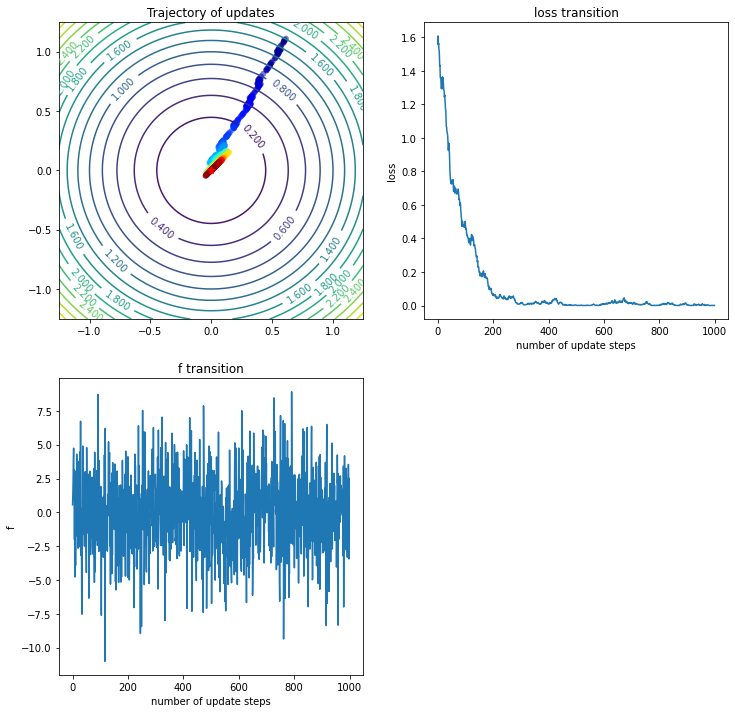

In [13]:
w_store = np.array(algo.wstore)
# 目的関数の真の値
w_star = f.w_star

# 等高線描画用
def circle(x, y,w):
    return (x-w) ** 2 + (y-w) ** 2

# wの軌跡
tmpdel = np.linalg.norm(w_star-w_init)
xvals = np.arange(w_star[0]-tmpdel, w_star[0]+tmpdel, 0.01)
yvals = np.arange(w_star[1]-tmpdel, w_star[1]+tmpdel, 0.01)
x1, x2 = np.meshgrid(xvals, yvals)
Z = circle(x1, x2,w_star[0])
myfig = plt.figure(figsize=(12,12))

ax1 = myfig.add_subplot(2,2,1)
plt.title("Trajectory of updates")
CS = ax1.contour(x1, x2, Z, levels=15)
c = np.linspace(0, _t_max, len(w_store))
ax1.scatter(w_store.T[0],w_store.T[1],c=c,cmap = _cmap,linewidths=0.01,alpha=0.5)
ax1.plot(*w_star, 'r*', markersize=8)
CS.clabel(inline=1, fontsize=10)


# 真の値とtステップ目のwとの２乗誤差の推移
ax2 = myfig.add_subplot(2,2,2)
plt.title("loss transition")
plt.xlabel('number of update steps')
plt.ylabel('loss')
ax2.plot(list(range(_t_max)),loss_transition)

# 関数値の推移
ax2 = myfig.add_subplot(2,2,3)
plt.title("f transition")
plt.xlabel('number of update steps')
plt.ylabel('f')
ax2.plot(list(range(_t_max)),f_store)

In [14]:
loss_transition = []
f_store=[]

f = model_opt.SumOfDifferent(err = 2)
algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.003)

In [15]:
for i in tqdm(algo):
    loss_transition.append(np.sum((f.w_star - algo.w) ** 2))
    f_store.append(f.f_opt(algo.w))
    algo.update(model=f)

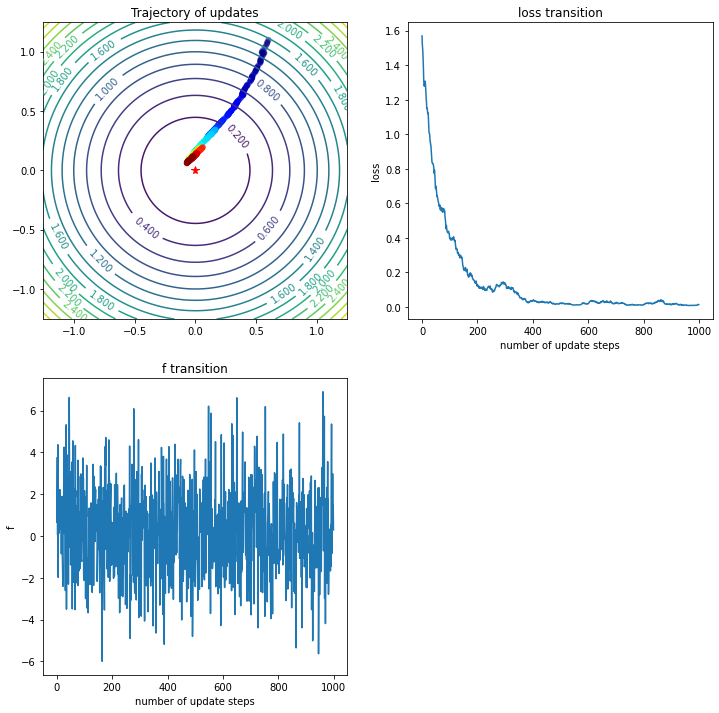

In [16]:
w_store = np.array(algo.wstore)
# 目的関数の真の値
w_star = f.w_star

# 等高線描画用
def circle(x, y,w):
    return (x-w) ** 2 + (y-w) ** 2

# wの軌跡
tmpdel = np.linalg.norm(w_star-w_init)
xvals = np.arange(w_star[0]-tmpdel, w_star[0]+tmpdel, 0.01)
yvals = np.arange(w_star[1]-tmpdel, w_star[1]+tmpdel, 0.01)
x1, x2 = np.meshgrid(xvals, yvals)
Z = circle(x1, x2,w_star[0])
myfig = plt.figure(figsize=(12,12))

ax1 = myfig.add_subplot(2,2,1)
plt.title("Trajectory of updates")
CS = ax1.contour(x1, x2, Z, levels=15)
c = np.linspace(0, _t_max, len(w_store))
ax1.scatter(w_store.T[0],w_store.T[1],c=c,cmap = _cmap,linewidths=0.01,alpha=0.5)
ax1.plot(*w_star, 'r*', markersize=8)
CS.clabel(inline=1, fontsize=10)


# 真の値とtステップ目のwとの２乗誤差の推移
ax2 = myfig.add_subplot(2,2,2)
plt.title("loss transition")
plt.xlabel('number of update steps')
plt.ylabel('loss')
ax2.plot(list(range(_t_max)),loss_transition)

# 関数値の推移
ax2 = myfig.add_subplot(2,2,3)
plt.title("f transition")
plt.xlabel('number of update steps')
plt.ylabel('f')
ax2.plot(list(range(_t_max)),f_store)

In [17]:
loss_transition = []
f_store=[]

f = model_opt.SumSquares(err = 2)
algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.003)

In [18]:
for i in tqdm(algo):
    loss_transition.append(np.sum((f.w_star - algo.w) ** 2))
    f_store.append(f.f_opt(algo.w))
    algo.update(model=f)

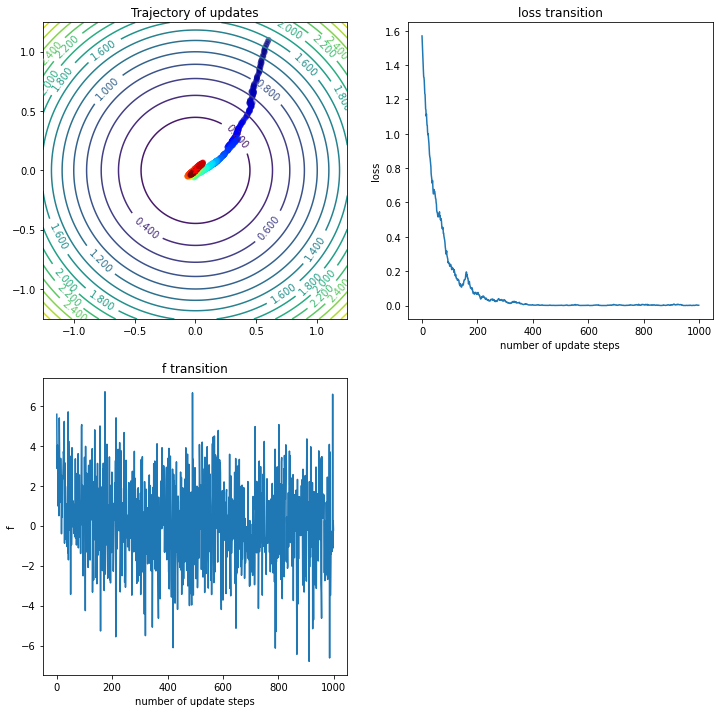

In [19]:
w_store = np.array(algo.wstore)
# 目的関数の真の値
w_star = f.w_star

# 等高線描画用
def circle(x, y,w):
    return (x-w) ** 2 + (y-w) ** 2

# wの軌跡
tmpdel = np.linalg.norm(w_star-w_init)
xvals = np.arange(w_star[0]-tmpdel, w_star[0]+tmpdel, 0.01)
yvals = np.arange(w_star[1]-tmpdel, w_star[1]+tmpdel, 0.01)
x1, x2 = np.meshgrid(xvals, yvals)
Z = circle(x1, x2,w_star[0])
myfig = plt.figure(figsize=(12,12))

ax1 = myfig.add_subplot(2,2,1)
plt.title("Trajectory of updates")
CS = ax1.contour(x1, x2, Z, levels=15)
c = np.linspace(0, _t_max, len(w_store))
ax1.scatter(w_store.T[0],w_store.T[1],c=c,cmap = _cmap,linewidths=0.01,alpha=0.5)
ax1.plot(*w_star, 'r*', markersize=8)
CS.clabel(inline=1, fontsize=10)


# 真の値とtステップ目のwとの２乗誤差の推移
ax2 = myfig.add_subplot(2,2,2)
plt.title("loss transition")
plt.xlabel('number of update steps')
plt.ylabel('loss')
ax2.plot(list(range(_t_max)),loss_transition)

# 関数値の推移
ax2 = myfig.add_subplot(2,2,3)
plt.title("f transition")
plt.xlabel('number of update steps')
plt.ylabel('f')
ax2.plot(list(range(_t_max)),f_store)

In [20]:
w_init = [1,1]
loss_transition = []
f_store=[]

f = model_opt.Trid(err = 2)
algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.003)

In [21]:
for i in tqdm(algo):
    loss_transition.append(np.sum((f.w_star - algo.w) ** 2))
    f_store.append(f.f_opt(algo.w))
    algo.update(model=f)

[2 2]


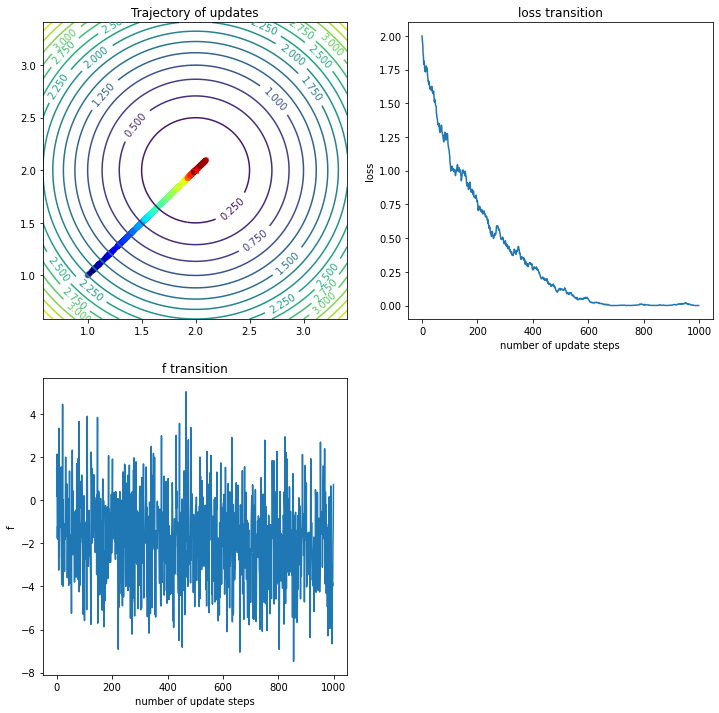

In [22]:
w_store = np.array(algo.wstore)
# 目的関数の真の値
w_star = f.w_star
print(w_star)
# 等高線描画用
def circle(x, y,w):
    return (x-w) ** 2 + (y-w) ** 2

# wの軌跡
tmpdel = np.linalg.norm(w_star-w_init)

xvals = np.arange(w_star[0]-tmpdel, w_star[0]+tmpdel, 0.01)
yvals = np.arange(w_star[1]-tmpdel, w_star[1]+tmpdel, 0.01)
x1, x2 = np.meshgrid(xvals, yvals)
Z = circle(x1, x2,w_star[0])
myfig = plt.figure(figsize=(12,12))

ax1 = myfig.add_subplot(2,2,1)
plt.title("Trajectory of updates")
CS = ax1.contour(x1, x2, Z, levels=15)
c = np.linspace(0, _t_max, len(w_store))
ax1.scatter(w_store.T[0],w_store.T[1],c=c,cmap = _cmap,linewidths=0.01,alpha=0.5)
ax1.plot(*w_star, 'r*', markersize=8)
CS.clabel(inline=1, fontsize=10)


# 真の値とtステップ目のwとの２乗誤差の推移
ax2 = myfig.add_subplot(2,2,2)
plt.title("loss transition")
plt.xlabel('number of update steps')
plt.ylabel('loss')
ax2.plot(list(range(_t_max)),loss_transition)

# 関数値の推移
ax2 = myfig.add_subplot(2,2,3)
plt.title("f transition")
plt.xlabel('number of update steps')
plt.ylabel('f')
ax2.plot(list(range(_t_max)),f_store)

In [23]:
w_init = [1,1]
loss_transition = []
f_store=[]

f = model_opt.ThreeHumpCamel(err = 0.1)
algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.003)

In [24]:
for i in tqdm(algo):
    loss_transition.append(np.sum((f.w_star - algo.w) ** 2))
    f_store.append(f.f_opt(algo.w))
    algo.update(model=f)

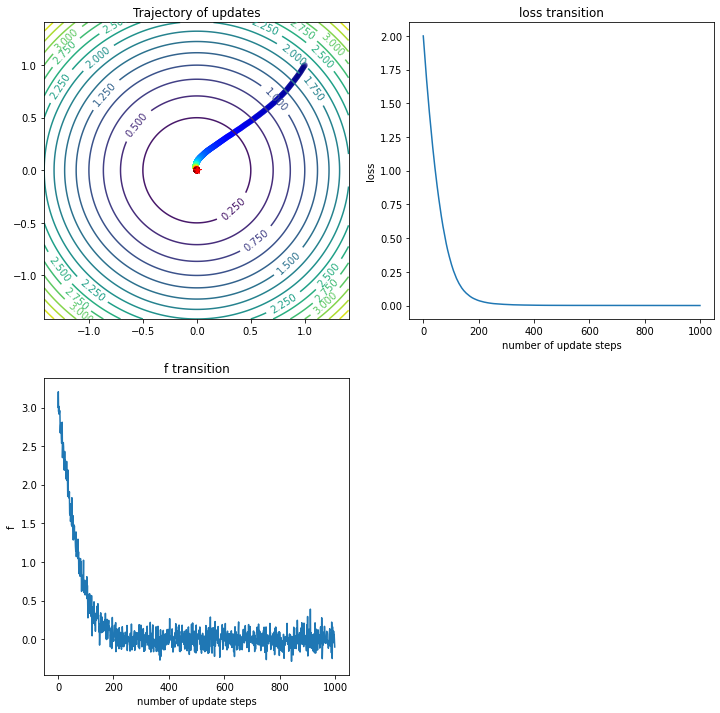

In [25]:
w_store = np.array(algo.wstore)
# 目的関数の真の値
w_star = f.w_star

# 等高線描画用
def circle(x, y,w):
    return (x-w) ** 2 + (y-w) ** 2

# wの軌跡
tmpdel = np.linalg.norm(w_star-w_init)
xvals = np.arange(w_star[0]-tmpdel, w_star[0]+tmpdel, 0.01)
yvals = np.arange(w_star[1]-tmpdel, w_star[1]+tmpdel, 0.01)
x1, x2 = np.meshgrid(xvals, yvals)
Z = circle(x1, x2,w_star[0])
myfig = plt.figure(figsize=(12,12))

ax1 = myfig.add_subplot(2,2,1)
plt.title("Trajectory of updates")
CS = ax1.contour(x1, x2, Z, levels=15)
c = np.linspace(0, _t_max, len(w_store))
ax1.scatter(w_store.T[0],w_store.T[1],c=c,cmap = _cmap,linewidths=0.01,alpha=0.5)
ax1.plot(*w_star, 'r*', markersize=8)
CS.clabel(inline=1, fontsize=10)


# 真の値とtステップ目のwとの２乗誤差の推移
ax2 = myfig.add_subplot(2,2,2)
plt.title("loss transition")
plt.xlabel('number of update steps')
plt.ylabel('loss')
ax2.plot(list(range(_t_max)),loss_transition)

# 関数値の推移
ax2 = myfig.add_subplot(2,2,3)
plt.title("f transition")
plt.xlabel('number of update steps')
plt.ylabel('f')
ax2.plot(list(range(_t_max)),f_store)

In [26]:
loss_transition = []
f_store=[]

f = model_opt.SixHumpCamel(err = 0)
algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.03)

In [27]:
for i in tqdm(algo):
    loss_transition.append(np.sum((f.w_star - algo.w) ** 2))
    f_store.append(f.f_opt(algo.w))
    algo.update(model=f)

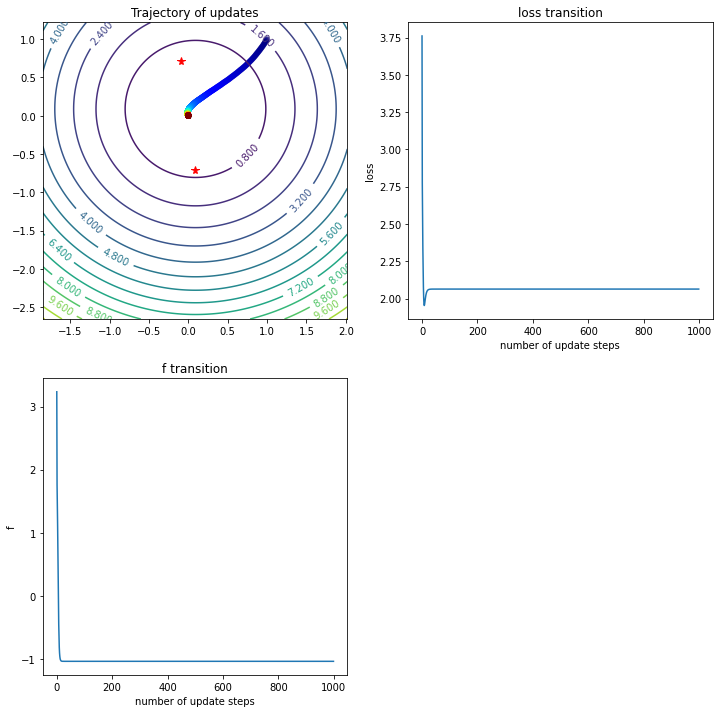

In [28]:
w_star = f.w_star

# 等高線描画用
def circle(x, y,w):
    return (x-w) ** 2 + (y-w) ** 2

# wの軌跡
tmpdel = np.linalg.norm(w_star-w_init)
xvals = np.arange(w_star[0]-tmpdel, w_star[0]+tmpdel, 0.01)
yvals = np.arange(w_star[1]-tmpdel, w_star[1]+tmpdel, 0.01)
x1, x2 = np.meshgrid(xvals, yvals)
Z = circle(x1, x2,w_star[0])
myfig = plt.figure(figsize=(12,12))

ax1 = myfig.add_subplot(2,2,1)
plt.title("Trajectory of updates")
CS = ax1.contour(x1, x2, Z, levels=15)
c = np.linspace(0, _t_max, len(w_store))
ax1.scatter(w_store.T[0],w_store.T[1],c=c,cmap = _cmap,linewidths=0.01,alpha=0.5)
ax1.plot(*w_star, 'r*', markersize=8)
ax1.plot(*(-w_star), 'r*', markersize=8)

CS.clabel(inline=1, fontsize=10)


# 真の値とtステップ目のwとの２乗誤差の推移
ax2 = myfig.add_subplot(2,2,2)
plt.title("loss transition")
plt.xlabel('number of update steps')
plt.ylabel('loss')
ax2.plot(list(range(_t_max)),loss_transition)

# 関数値の推移
ax2 = myfig.add_subplot(2,2,3)
plt.title("f transition")
plt.xlabel('number of update steps')
plt.ylabel('f')
ax2.plot(list(range(_t_max)),f_store)

In [29]:
w_init = [2,1.0]
loss_transition = []
f_store=[]

f = model_opt.DixonPrice(err = 0)
algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.01)

In [30]:
for i in tqdm(algo):
    loss_transition.append(np.sum((f.w_star - algo.w) ** 2))
    f_store.append(f.f_opt(algo.w))
    print(f.g_opt(algo.w))
    algo.update(model=f)

[2. 0.]
[1.88 0.64]
[1.86927232 0.4223013 ]
[1.82410908 0.48206778]
[1.79078811 0.45481984]
[1.75482265 0.45389239]
[1.72053939 0.4454442 ]
[1.68667103 0.43919649]
[1.65355106 0.4324662 ]
[1.62107344 0.42596309]
[1.58924843 0.41950608]
[1.55805721 0.41313839]
[1.52748833 0.40684916]
[1.49752894 0.40063999]
[1.46816681 0.39450973]
[1.43938989 0.38845783]
[1.41118639 0.38248361]
[1.38354474 0.37658639]
[1.35645361 0.37076554]
[1.3299019  0.36502037]
[1.30387874 0.35935025]
[1.27837346 0.35375449]
[1.25337561 0.34823245]
[1.22887498 0.34278346]
[1.20486153 0.33740686]
[1.18132544 0.33210201]
[1.15825708 0.32686822]
[1.13564702 0.32170486]
[1.11348602 0.31661126]
[1.09176503 0.31158676]
[1.07047517 0.30663071]
[1.04960777 0.30174246]
[1.02915429 0.29692134]
[1.0091064 0.2921667]
[0.98945593 0.28747789]
[0.97019486 0.28285426]
[0.95131536 0.27829516]
[0.93280973 0.27379993]
[0.91467044 0.26936793]
[0.89689011 0.26499851]
[0.87946153 0.26069103]
[0.8623776  0.25644483]
[0.84563138 0.25225928

[1.84961993e-04 6.73681715e-05]
[1.81486495e-04 6.61023705e-05]
[1.78076304e-04 6.48603520e-05]
[1.74730191e-04 6.36416692e-05]
[1.71446954e-04 6.24458838e-05]
[1.68225411e-04 6.12725655e-05]
[1.65064403e-04 6.01212923e-05]
[1.61962791e-04 5.89916499e-05]
[1.58919461e-04 5.78832321e-05]
[1.55933316e-04 5.67956400e-05]
[1.53003282e-04 5.57284824e-05]
[1.50128305e-04 5.46813754e-05]
[1.47307351e-04 5.36539422e-05]
[1.44539403e-04 5.26458134e-05]
[1.41823466e-04 5.16566261e-05]
[1.39158564e-04 5.06860245e-05]
[1.36543736e-04 4.97336594e-05]
[1.33978041e-04 4.87991883e-05]
[1.31460558e-04 4.78822748e-05]
[1.28990379e-04 4.69825893e-05]
[1.26566615e-04 4.60998079e-05]
[1.24188395e-04 4.52336130e-05]
[1.21854863e-04 4.43836931e-05]
[1.19565179e-04 4.35497424e-05]
[1.17318520e-04 4.27314609e-05]
[1.15114075e-04 4.19285541e-05]
[1.12951054e-04 4.11407332e-05]
[1.10828676e-04 4.03677148e-05]
[1.08746178e-04 3.96092207e-05]
[1.06702812e-04 3.88649781e-05]
[1.04697841e-04 3.81347192e-05]
[1.02730

[9.02339190e-08 3.28674773e-08]
[8.85384148e-08 3.22498958e-08]
[8.68747687e-08 3.16439205e-08]
[8.52423829e-08 3.10493302e-08]
[8.36406704e-08 3.04659090e-08]
[8.20690542e-08 2.98934507e-08]
[8.05269686e-08 2.93317495e-08]
[7.90138599e-08 2.87805993e-08]
[7.75291809e-08 2.82398142e-08]
[7.60724004e-08 2.77091832e-08]
[7.46429927e-08 2.71885255e-08]
[7.32404435e-08 2.66776500e-08]
[7.18642483e-08 2.61763760e-08]
[7.05139125e-08 2.56845175e-08]
[6.91889492e-08 2.52019037e-08]
[6.78888838e-08 2.47283487e-08]
[6.66132438e-08 2.42637069e-08]
[6.53615730e-08 2.38077972e-08]
[6.4133423e-08 2.3360444e-08]
[6.29283501e-08 2.29214963e-08]
[6.17459213e-08 2.24907936e-08]
[6.05857093e-08 2.20681900e-08]
[5.94472973e-08 2.16535298e-08]
[5.83302771e-08 2.12466573e-08]
[5.72342462e-08 2.08474267e-08]
[5.61588083e-08 2.04557075e-08]
[5.51035786e-08 2.00713438e-08]
[5.40681770e-08 1.96942001e-08]
[5.30522315e-08 1.93241406e-08]
[5.20553747e-08 1.89610397e-08]
[5.10772487e-08 1.86047619e-08]
[5.0117502

In [31]:
f_store

[1.0,
 0.9611999999999999,
 0.9242582587977729,
 0.8887836513798175,
 0.8546847825517095,
 0.8219043406755904,
 0.7903906321437543,
 0.7600942989521683,
 0.7309679536833908,
 0.7029660666870473,
 0.6760448932464114,
 0.6501624022799825,
 0.6252782090507993,
 0.6013535102597273,
 0.5783510217803671,
 0.5562349188358685,
 0.5349707785442372,
 0.5145255247329968,
 0.49486737493461086,
 0.47596578947611634,
 0.4577914225801583,
 0.44031607539782125,
 0.4235126508968196,
 0.4073551105316282,
 0.3918184326250429,
 0.3768785723934446,
 0.36251242355072566,
 0.3486977814284111,
 0.3354133075519701,
 0.32263849561569985,
 0.31035363880083583,
 0.29853979838373323,
 0.28717877358307065,
 0.27625307259704607,
 0.26574588478347355,
 0.2556410539375572,
 0.24592305262390315,
 0.23657695752105637,
 0.2275884257384932,
 0.21894367206759247,
 0.21062944712962772,
 0.20263301638528802,
 0.1949421399716382,
 0.18754505333378177,
 0.1804304486197828,
 0.1735874568086507,
 0.16700563054238693,
 0.16067492

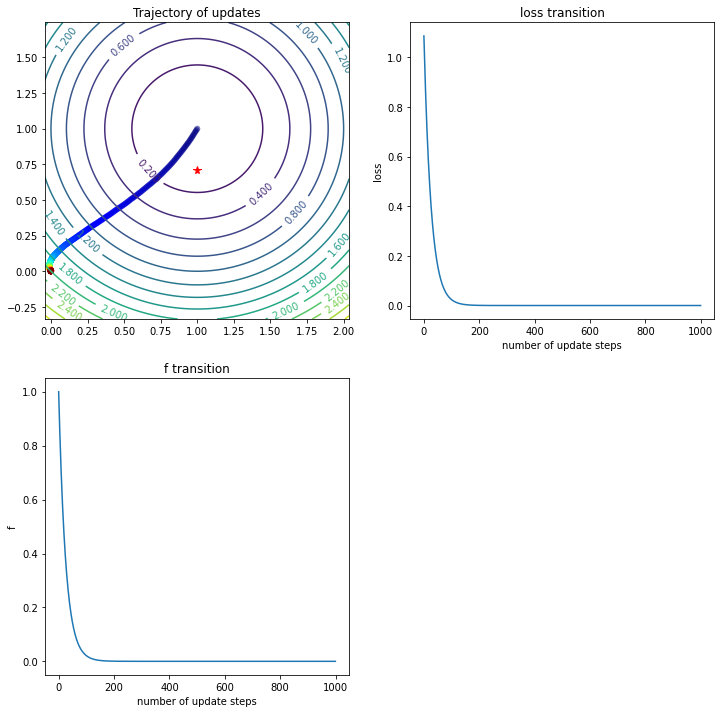

In [32]:
w_star = f.w_star

# 等高線描画用
def circle(x, y,w):
    return (x-w) ** 2 + (y-w) ** 2

# wの軌跡
tmpdel = np.linalg.norm(w_star-w_init)
xvals = np.arange(w_star[0]-tmpdel, w_star[0]+tmpdel, 0.01)
yvals = np.arange(w_star[1]-tmpdel, w_star[1]+tmpdel, 0.01)
x1, x2 = np.meshgrid(xvals, yvals)
Z = circle(x1, x2,w_star[0])
myfig = plt.figure(figsize=(12,12))

ax1 = myfig.add_subplot(2,2,1)
plt.title("Trajectory of updates")
CS = ax1.contour(x1, x2, Z, levels=15)
c = np.linspace(0, _t_max, len(w_store))
ax1.scatter(w_store.T[0],w_store.T[1],c=c,cmap = _cmap,linewidths=0.01,alpha=0.5)
ax1.plot(*w_star, 'r*', markersize=8)

CS.clabel(inline=1, fontsize=10)


# 真の値とtステップ目のwとの２乗誤差の推移
ax2 = myfig.add_subplot(2,2,2)
plt.title("loss transition")
plt.xlabel('number of update steps')
plt.ylabel('loss')
ax2.plot(list(range(_t_max)),loss_transition)

# 関数値の推移
ax2 = myfig.add_subplot(2,2,3)
plt.title("f transition")
plt.xlabel('number of update steps')
plt.ylabel('f')
ax2.plot(list(range(_t_max)),f_store)

In [33]:
w_star

array([1.        , 0.70710678])

In [44]:
w_init= [3,3]
loss_transition = []
f_store=[]

f = model_opt.RosenBrock(err = 0)
algo = algo_GD.SGD(w_init=[3,3],t_max=_t_max,a=0.0003)

In [45]:
for i in tqdm(algo):
    loss_transition.append(np.sum((f.w_star - algo.w) ** 2))
    f_store.append(f.f_opt(algo.w))
    algo.update(model=f)

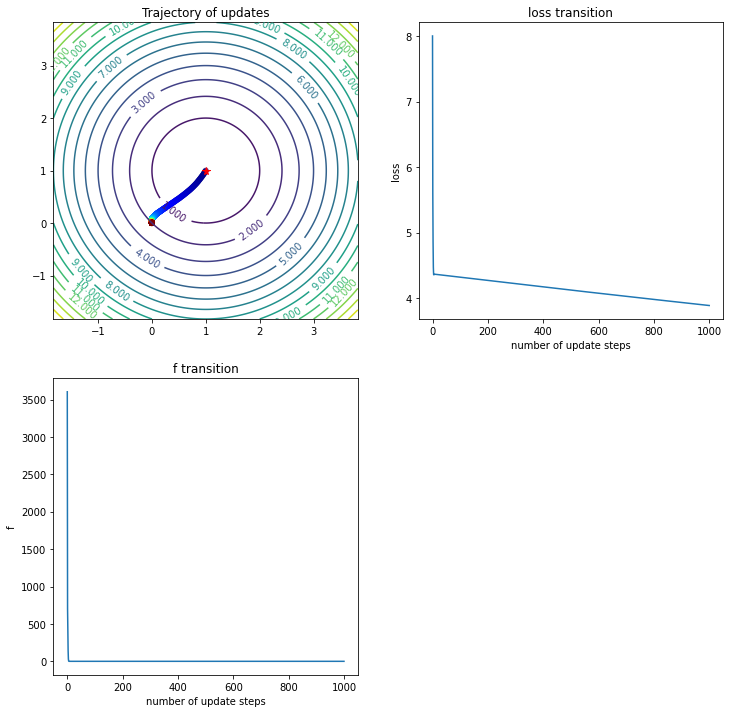

In [46]:
w_star = f.w_star

# 等高線描画用
def circle(x, y,w):
    return (x-w) ** 2 + (y-w) ** 2

# wの軌跡
tmpdel = np.linalg.norm(w_star-w_init)
xvals = np.arange(w_star[0]-tmpdel, w_star[0]+tmpdel, 0.01)
yvals = np.arange(w_star[1]-tmpdel, w_star[1]+tmpdel, 0.01)
x1, x2 = np.meshgrid(xvals, yvals)
Z = circle(x1, x2,w_star[0])
myfig = plt.figure(figsize=(12,12))

ax1 = myfig.add_subplot(2,2,1)
plt.title("Trajectory of updates")
CS = ax1.contour(x1, x2, Z, levels=15)
c = np.linspace(0, _t_max, len(w_store))
ax1.scatter(w_store.T[0],w_store.T[1],c=c,cmap = _cmap,linewidths=0.01,alpha=0.5)
ax1.plot(*w_star, 'r*', markersize=8)

CS.clabel(inline=1, fontsize=10)


# 真の値とtステップ目のwとの２乗誤差の推移
ax2 = myfig.add_subplot(2,2,2)
plt.title("loss transition")
plt.xlabel('number of update steps')
plt.ylabel('loss')
ax2.plot(list(range(_t_max)),loss_transition)

# 関数値の推移
ax2 = myfig.add_subplot(2,2,3)
plt.title("f transition")
plt.xlabel('number of update steps')
plt.ylabel('f')
ax2.plot(list(range(_t_max)),f_store)

In [43]:
w_store

array([[ 1.00000000e+00,  1.00000000e+00],
       [ 9.94659884e-01,  9.91313123e-01],
       [ 9.89215730e-01,  9.82554984e-01],
       ...,
       [-1.25787873e-03,  2.38973432e-04],
       [-1.08039517e-03,  7.92128859e-04],
       [-1.28283005e-03,  8.64261662e-04]])

In [38]:
2 ** -0.5

0.7071067811865476